<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-помесячной-выручки-по-пользователям" data-toc-modified-id="Анализ-помесячной-выручки-по-пользователям-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ помесячной выручки по пользователям</a></span><li><span><a href="#Анализ-поведения-пользователей" data-toc-modified-id="Анализ-поведения-пользователей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ поведения пользователей</a></span></li></ul></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Статистический анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование тарифов оператора сотовой связи  

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

**Описание тарифов**  
Тариф «Смарт»  
- Ежемесячная плата: 550 рублей  
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
- Стоимость услуг сверх тарифного пакета:  
    минута разговора: 3 рубля  
    сообщение: 3 рубля  
    1 Гб интернет-трафика: 200 рублей  

**Тариф «Ультра»**  
- Ежемесячная плата: 1950 рублей  
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
- Стоимость услуг сверх тарифного пакета:  
    минута разговора: 1 рубль  
    сообщение: 1 рубль   
    1 Гб интернет-трафика: 150 рублей  
    
*Примечание:*   
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.  
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

### Описание данных  

**Таблица** `users` (информация о пользователях):  
`user_id` — уникальный идентификатор пользователя  
`first_name` — имя пользователя  
`last_name` — фамилия пользователя  
`age` — возраст пользователя (годы)  
`reg_date` — дата подключения тарифа (день, месяц, год)  
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
`city` — город проживания пользователя  
`tariff` — название тарифного плана  

**Таблица** `calls` (информация о звонках):  
`id` — уникальный номер звонка  
`call_date` — дата звонка  
`duration` — длительность звонка в минутах  
`user_id` — идентификатор пользователя, сделавшего звонок  

**Таблица** `messages` (информация о сообщениях):  
`id` — уникальный номер сообщения  
`message_date` — дата сообщения  
`user_id` — идентификатор пользователя, отправившего сообщение  

**Таблица** `internet` (информация об интернет-сессиях):  
`id` — уникальный номер сессии  
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
`session_date` — дата интернет-сессии  
`user_id` — идентификатор пользователя   

**Таблица** `tariffs` (информация о тарифах):  
`tariff_name` — название тарифа  
`rub_monthly_fee` — ежемесячная абонентская плата в рублях  
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## План работы 

1) Вначале изучим данные из файлов: сколько переменных и их типы, число записей, число миссингов.  
2) Затем приступим к преобработке данных: заменим типы переменных если нужно, примем решение, что делать с миссингами: оставить, удалить или заменить синтетическими данными.  
3) Посчитаем необходимые дополнительные сведения в соответствии с ТЗ: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя.  
4) Проанализируем данные (исследовательский анализ данных): проанализируем поведение пользователей, проведем анализ помесячной выручки по пользователям.  
5) Проведем статистический анализ данных и проверим две гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных из файла

In [62]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import math
import statistics # для построения доверительных интервалов
from matplotlib import pyplot as plt
from math import sqrt

#from pandas.api.types import CategoricalDtype

from scipy import stats as st

pd.options.display.float_format = '{:,.2f}'.format

In [63]:
# загрузим данные и сохраним в переменную data
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

# users = pd.read_csv('users.csv')
# calls = pd.read_csv('calls.csv')
# messages = pd.read_csv('messages.csv')
# internet = pd.read_csv('internet.csv')
# tariffs = pd.read_csv('tariffs.csv')

## Предобработка данных

#### Информация о пользователях

In [64]:
# посмотрим повнимательнее на наши датасеты
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [65]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [66]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [67]:
users.duplicated().sum()

0

In [68]:
# проверим есть ли дубли по именам
users[['first_name', 'last_name']].agg(' '.join, axis=1) .str.lower().duplicated().sum()

0

In [69]:
users[['user_id']].duplicated().sum()

0

В данных `users` информация о 500 пользователях. Всего в датасете 8 переменных, из которых два определились как числовые, а остальные как тип object. В даннах необходимо поменять тип данных с object на тип datе в столбце reg_date, поскольку в ней содержатся информация о дате подключения тарифа.  Полных дублей нет.
По поводу миссингов. Миссинги только в столбце `churn_date` - дата прекращения пользования тарифом, но как уже описано в документации, если в данных есть миссинги (462 - очень много, около 92%), то тариф ещё действовал на момент выгрузки данных. Эти миссинги оставляем без изменений.  
Также есть желание изменить тип с int на str в столбце `user_id`. Но сначала проверю какой тип у этого параментра в других датасетах.

In [70]:
# поменяем тип данных
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [71]:
users.info() # проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [72]:
# посмотрим как распределены данные в age 
users['age'].describe()

count   500.00
mean     46.59
std      16.67
min      18.00
25%      32.00
50%      46.00
75%      62.00
max      75.00
Name: age, dtype: float64

<AxesSubplot:>

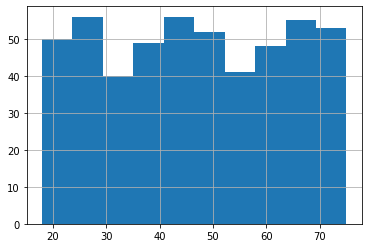

In [73]:
users['age'].hist()

Средний возраст пользователей - 46,5 лет, медианный - 46 лет. Самому юному пользователю 18 лет, а самому старшему - 75 лет. Судя пр гистограмме, данные распределены более-менее равномерно по возрасту.

In [74]:
# выясним из каких населенных пунктов наши пользователи
users['city'].value_counts().to_frame()

,city
Москва,99
Санкт-Петербург,39
Новосибирск,16
Омск,14
Казань,14
...,...
Нижневартовск,1
Иваново,1
Архангельск,1
Подольск,1


In [75]:
users['city'].value_counts().to_frame().tail(10)

,city
Сургут,2
Калининград,2
Тамбов,2
Ижевск,2
Волжский,2
Нижневартовск,1
Иваново,1
Архангельск,1
Подольск,1
Химки,1


Пользователи представлены в 76 населенных пунктах. Больше всего пользователей в Москве, а затем идут Санкт-Петербург, Новосибирск, Казань и Омск. Меньше всего (по 1 пользователю) в Химках, Иваново, Нижневартовске, Архангельске и Подольске.

In [76]:
# выясним за какой период выгружены данные
users['reg_date'].dt.year.unique()

array([2018])

In [77]:
users['reg_date'].dt.month.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [78]:
# как распределены клиенты по тарифам
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Видим, что большинство пользователей используют тариф `smart` (351 против 149).

Данные выгружены за весь 2018 год.

#### Информация о звонках

In [79]:
# посмотрим на датасет calls (информация о звонках)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [80]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [81]:
calls[['id', 'user_id']][115:119]

,id,user_id
115,1000_115,1000
116,1000_116,1000
117,1000_117,1000
118,1000_118,1000


In [82]:
calls['id'].duplicated().sum()

0

Датасет `calls` полный, здесь нет пропущенных значений. В базе есть информация по 202607 звонкам. Тип параметра `call_date` также заменим на тип date. Тип столбца `user_id` целочисленный, оставим без изменений. Дублей по айди звонков нет.  
Заметим, также в столбце `id` - уникальный номер звонка начинается с айди уникального пользователя, а после нижнего подчеркивания идет порядковый номер совершенного звонка, что в дальнейшем нам может понадобится.

In [83]:
# поменяем тип данных
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [84]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


<AxesSubplot:>

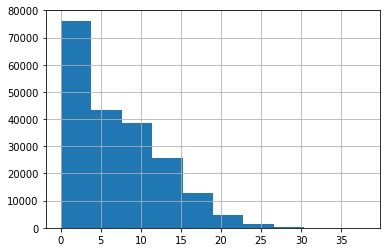

In [85]:
# посмотрим на статистику по длительности звонков
calls['duration'].hist()

In [86]:
calls['duration'].describe()

count   202,607.00
mean          6.76
std           5.84
min           0.00
25%           1.30
50%           6.00
75%          10.70
max          38.00
Name: duration, dtype: float64

Судя по гистограмме и описательной статистике очень много коротких звонков (от 0 до 4 минут). При этом медианная продолжительность звонка равна 6 минутам, минимальная - 0, а максимальная - 38 минутам. Среднее равно 6,75 мин, а стандартное отклонение - 5,84 мин.

Каких-либо аномалий в данных не наблюдается.

Проверим, что данные в этом датасете тоже выгржены за 2018 год.

In [87]:
display(calls['call_date'].dt.year.unique())
display(calls['call_date'].dt.month.sort_values().unique())

array([2018])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Все верно.

#### Информация о сообщениях

In [88]:
# рассмотрим базу messages (информация о сообщениях)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [89]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [90]:
messages['id'].duplicated().sum()

0

Уникальный айди сообщению присвоен по такому же принципу, что и уникальные айди звонков. В датасете есть информация по 123036 сообщениям. Пропусков и дублей нет. Заменим тип у колонки с датами.

In [91]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [92]:
# проверим, что данные выгружены за 2018 года
display(messages['message_date'].dt.year.unique())
display(messages['message_date'].dt.month.sort_values().unique())

array([2018])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Верно, данные в датасете `message_date` выгружены за 2018 год.

#### Информация об интернет-сессиях

In [93]:
# рассмотрим датасет internet (информация об интернет-сессиях)
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [94]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [95]:
internet['id'].duplicated().sum()

0

В базе содержится информация о 149396 сессиях в интернете, без дублей. Данные полные, без миссингов. Следует поменять тип данных в колонке `session_date`. Еще нужно взглянуть на колонку `Unnamed: 0`, в документации к датасету нет информации про эту переменную. Возможно этот столбец дублирует индексы строк.

In [96]:
# поменяем тип данных
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [97]:
internet['Unnamed: 0'][100:110]

100    100
101    101
102    102
103    103
104    104
105    105
106    106
107    107
108    108
109    109
Name: Unnamed: 0, dtype: int64

In [98]:
internet['Unnamed: 0'].tail(10)

149386    149386
149387    149387
149388    149388
149389    149389
149390    149390
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, dtype: int64

In [99]:
internet['Unnamed: 0'].nunique()

149396

Видимо и правду колонке `'Unnamed: 0'` дублирует индекс. Избавимся от нее.

In [100]:
internet.drop(columns = ['Unnamed: 0'], inplace=True)

In [101]:
internet.info() # проверим, что удаление прошло

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [102]:
# проверим, что данные выгружены за 2018 год
display(internet['session_date'].dt.year.unique())
display(internet['session_date'].dt.month.sort_values().unique())

array([2018])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Все верно. Теперь проверим на распределение значений в колонке `mb_used`.

<AxesSubplot:>

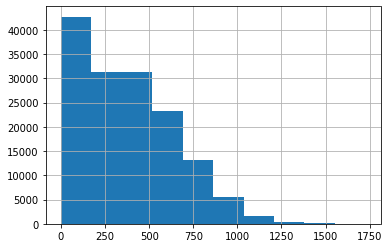

In [103]:
internet['mb_used'].hist()

In [104]:
internet['mb_used'].describe()

count   149,396.00
mean        370.19
std         278.30
min           0.00
25%         138.19
50%         348.01
75%         559.55
max       1,724.83
Name: mb_used, dtype: float64

В среднем интернет-трафик пользователей составляет 370 мгб, ст.откл. - 278 мгб. Минимальное число - 0 мгб, максимальное - 1724 мгб. Распределение скошено вправо. Чаще всего пользователи за 2018 год в среднем потратили от 0 до 500 мгб.

In [105]:
# рассмотрим датасет tariffs (информация о тарифах)
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [106]:
tariffs.shape

(2, 8)

In [107]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В этой таблице только две строки (поскольку всего 2 тарифа). По каждому тарифу представлены информация о ежемесячное абонентской плате (в руб.), лимит минут, сообщений и интернет-трафика в месяц включено в абонентскую плату, а также стоимость услуг (минут звонка, сообщений и интернет-трафика) после исчерпания тарифного пакета.  

Данные полные.

### Выводы 

Даны 5 датасетов: первый датасет содержит информацию о клиентах, во втором содержится информация по уникальным звонкам, сделанных за изучаемый период, в третьем - информация об исходящих сообщениях, в четвертом - про интернет-трафик (информация об уникальных интернет-сессиях), и пятый датасет дает нам информацию про тарифы, которые исследуем. 
В каждом датасете данные представлены за один период - 2018 год. Аномальных значений или явных ошибок в данных не обнаружено.  
Всего 500 пользователей, эти 500 пользователей совершили более 200 тыс. звонков, направили более 120 тыс сообщений и совершали практически 150 тыс. интернет-сессий. Кажется вполне логичным объединить 4 базы, которые включают уникальный айди пользователя в один большой датасет. Но тогда появится много миссингов, потому что длины баз про совершенные звонки, отправленные сообщения и выполненные интернет-сессии различаются. Пока данные объединять не буду, если дальнейшем анализе возникнет необходимость объединить, то тогда сделаю.  
А так, можно будет подготовить сводные таблицы по таблицам `calls`, `messengers`, `internet` и их объединить с `users`. 

## Исследовательский анализ

### Анализ помесячной выручки по пользователям

**Задание**.

Посчитайте для каждого пользователя:  
- количество сделанных звонков и израсходованных минут разговора по месяцам;  
- количество отправленных сообщений по месяцам;  
- объем израсходованного интернет-трафика по месяцам;  
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


Поскольку «Мегалайн» всегда округляет секунды до минут, то округлим наши данные звонкам. По поводу округления мегабайт до гигабайт, мне кажется разумным округлить трафик после того, как будет посчитан суммарный трафик по месяцам, поскольку есть сомнения по поводу того, что трафик округляется до гигабайт при каждом сеансе. 



In [108]:
calls['duration'] = np.ceil(calls['duration'])
display(calls['duration'].head(3))


0   0.00
1   0.00
2   3.00
Name: duration, dtype: float64

Ниже округлила интернет-трафик по обычным правилам вверх. Затем далее ниже буду перводить в гигайбайты.


In [109]:
internet['mb_used'] = np.ceil(internet['mb_used'])

Добавим в наши датасеты с информацией по звонкам, сообщениям и интернет-сессиям столбец с месяцами.

In [110]:
calls['month'] = calls['call_date'].dt.month_name()
messages['month'] = messages['message_date'].dt.month_name()
internet['month'] = internet['session_date'].dt.month_name()

In [111]:
# создадим словарь для того, чтобы отсортировать значения в данных по месяцам
month_dict = (
    {'January': 0, 
     'February': 1, 
     'March': 2,
     'April': 3, 
     'May': 4, 
     'June': 5, 
     'July': 6, 
     'August': 7, 
     'September': 8, 
     'October': 9, 
     'November': 10,
     'December': 11} 
)

In [112]:
calls_pivot = (
    calls
    .pivot_table(index=['month', 'user_id'], 
                 values='duration', 
                 aggfunc=['count', 'sum'])
    .sort_values(by=['month'], key=lambda x: x.map(month_dict))
)

In [113]:
# Код ревьюера

# От пустой будет 0
print(pd.Series([np.nan]).sum())

# От пустой будет 1
print(pd.Series([np.nan]).sum(skipna=False))

0.0
nan


In [114]:
# Код ревьюера

calls_copy = calls.copy()
calls_copy['month'] = calls_copy['month'].astype('category')

calls_copy.groupby(['month','user_id']).agg({'duration' : lambda x : x.sum(skipna=False)}).dropna()

duration
month     user_id          
April     1005       712.00
          1006       356.00
          1007       198.00
          1009       324.00
          1011       371.00
...                     ...
September 1494       501.00
          1495       813.00
          1496       486.00
          1498       471.00
          1499        70.00

[3174 rows x 1 columns]

In [115]:
calls_pivot.head(10)

count      sum
                duration duration
month   user_id                  
January 1429          10    70.00
        1254          59   466.00
        1238           8    55.00
        1227          67   471.00
        1219          18   146.00
        1204          50   305.00
        1193          53   388.00
        1176          25   187.00
        1168          38   277.00
        1155          44   337.00

In [116]:
calls_pivot.shape[0]

3174

In [117]:
calls.groupby(['user_id',calls['call_date'].dt.month]).agg(duration=('duration','sum'))

duration
user_id call_date          
1000    5            159.00
        6            172.00
        7            340.00
        8            408.00
        9            466.00
...                     ...
1498    10           247.00
1499    9             70.00
        10           449.00
        11           612.00
        12           492.00

[3174 rows x 1 columns]

In [118]:
# переименуем двухэтажные названия столбцов
calls_pivot.columns = ['count_of_calls', 'full_duration']

In [119]:
calls_pivot.head(5) # проверим

count_of_calls  full_duration
month   user_id                               
January 1429                 10          70.00
        1254                 59         466.00
        1238                  8          55.00
        1227                 67         471.00
        1219                 18         146.00

In [120]:
# найдем количество отправленных сообщений по месяцам
messages_pivot = (
    messages
    .pivot_table(index=['month', 'user_id'], 
                 values='id', 
                 aggfunc='count')
    .sort_values(by=['month'], key=lambda x: x.map(month_dict))
)

In [121]:
messages_pivot.head(10)

id
month   user_id    
January 1433     74
        1238     34
        1227     27
        1219      3
        1189      1
        1176     20
        1168     14
        1155     48
        1282     29
        1135      1

In [122]:
messages_pivot.columns = ['count_of_messages']

In [123]:
# найдем объем израсходованного интернет-трафика по месяцам
internet_pivot = (
    internet
    .pivot_table(index=['month', 'user_id'], 
                 values='mb_used', 
                 aggfunc='sum')
    .sort_values(by=['month'], key=lambda x: x.map(month_dict))
)


In [124]:
internet_pivot.head(10)

mb_used
month   user_id          
January 1433     9,462.00
        1254    19,707.00
        1238    10,897.00
        1227    16,648.00
        1219     7,064.00
        1204    15,854.00
        1193     7,150.00
        1176     6,864.00
        1168     8,161.00
        1155    20,151.00

In [125]:
internet_pivot.columns = ['mb_duration']

Объединим получившиеся сводные таблицы в один общий

In [126]:
data = calls_pivot.join([messages_pivot, internet_pivot], how='outer')

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, ('April', 1005) to ('September', 1499)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   count_of_calls     3174 non-null   float64
 1   full_duration      3174 non-null   float64
 2   count_of_messages  2717 non-null   float64
 3   mb_duration        3203 non-null   float64
dtypes: float64(4)
memory usage: 130.4+ KB


In [128]:
data = (
    data.sort_values(by=['month'], key=lambda x: x.map(month_dict))
)

In [129]:
data.head(5)

count_of_calls  full_duration  count_of_messages  mb_duration
month   user_id                                                               
January 1429              10.00          70.00                NaN     2,149.00
        1254              59.00         466.00                NaN    19,707.00
        1238               8.00          55.00              34.00    10,897.00
        1227              67.00         471.00              27.00    16,648.00
        1219              18.00         146.00               3.00     7,064.00

In [130]:
data.isna().sum()

count_of_calls        40
full_duration         40
count_of_messages    497
mb_duration           11
dtype: int64

Видим, что в наших данных есть миссинги. Вероятнее всего, если нет данных, то пользователь пользовался той или иной услугой, например, не звонил в определенный месяц, или не писал сообщения, или не использовал интернет. Заменим миссинги нулями.

In [131]:
data.fillna(0, inplace=True)

In [132]:
# проверим
data.isna().sum()

count_of_calls       0
full_duration        0
count_of_messages    0
mb_duration          0
dtype: int64

Миссингов не осталось.   
Теперь добавим в таблицу информацию по тарифам из `users`.

In [133]:
data = data.join(users.set_index('user_id'), on='user_id')

In [134]:
data.head(5)

count_of_calls  full_duration  count_of_messages  \
month   user_id                                                     
January 1429              10.00          70.00               0.00   
        1254              59.00         466.00               0.00   
        1238               8.00          55.00              34.00   
        1227              67.00         471.00              27.00   
        1219              18.00         146.00               3.00   

                 mb_duration  age  churn_date             city  first_name  \
month   user_id                                                              
January 1429        2,149.00   54         NaN  Санкт-Петербург      Джулия   
        1254       19,707.00   75  2018-08-17           Москва  Александра   
        1238       10,897.00   57         NaN   Ростов-на-Дону    Радислав   
        1227       16,648.00   66         NaN  Санкт-Петербург       Раиса   
        1219        7,064.00   75         NaN            Киров      Кузьма   

                last_name   reg_date tariff  
month   user_id                              
January 1429     Белякова 2018-01-26  smart  
        1254     Сухарева 2018-01-04  ultra  
        1238       Наумов 2018-01-08  smart  
        1227     Калинина 2018-01-09  smart  
        1219     Некрасов 2018-01-21  smart

Сработало!!!

Теперь посчитаем помесячную выручку с каждого пользователя. Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану. 

Но для начала нужно добавить информацию по трафикам из `tariffs`

In [135]:
data = data.rename(columns={'tariff': 'tariff_name'})

In [136]:
data.head(5)

count_of_calls  full_duration  count_of_messages  \
month   user_id                                                     
January 1429              10.00          70.00               0.00   
        1254              59.00         466.00               0.00   
        1238               8.00          55.00              34.00   
        1227              67.00         471.00              27.00   
        1219              18.00         146.00               3.00   

                 mb_duration  age  churn_date             city  first_name  \
month   user_id                                                              
January 1429        2,149.00   54         NaN  Санкт-Петербург      Джулия   
        1254       19,707.00   75  2018-08-17           Москва  Александра   
        1238       10,897.00   57         NaN   Ростов-на-Дону    Радислав   
        1227       16,648.00   66         NaN  Санкт-Петербург       Раиса   
        1219        7,064.00   75         NaN            Киров      Кузьма   

                last_name   reg_date tariff_name  
month   user_id                                   
January 1429     Белякова 2018-01-26       smart  
        1254     Сухарева 2018-01-04       ultra  
        1238       Наумов 2018-01-08       smart  
        1227     Калинина 2018-01-09       smart  
        1219     Некрасов 2018-01-21       smart

In [137]:
data = data.merge(tariffs, on='tariff_name')

In [138]:
data.tail(5)

,count_of_calls,full_duration,count_of_messages,mb_duration,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3209,153.00,"1,199.00",45.00,"29,339.00",28,NaN,Кострома,Лилия,Ананьева,2018-01-24,ultra,1000,30720,3000,1950,150,1,1
3210,114.00,841.00,178.00,"25,130.00",30,NaN,Кемерово,Клавдия,Абдулина,2018-09-29,ultra,1000,30720,3000,1950,150,1,1
3211,48.00,407.00,118.00,"12,503.00",48,NaN,Нижний Новгород,Святослав,Жданов,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
3212,37.00,278.00,224.00,"31,972.00",19,NaN,Самара,Алексей,Медведев,2018-10-14,ultra,1000,30720,3000,1950,150,1,1
3213,27.00,188.00,6.00,"11,884.00",63,NaN,Набережные Челны,Валерий,Галкин,2018-11-12,ultra,1000,30720,3000,1950,150,1,1


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   count_of_calls         3214 non-null   float64       
 1   full_duration          3214 non-null   float64       
 2   count_of_messages      3214 non-null   float64       
 3   mb_duration            3214 non-null   float64       
 4   age                    3214 non-null   int64         
 5   churn_date             187 non-null    object        
 6   city                   3214 non-null   object        
 7   first_name             3214 non-null   object        
 8   last_name              3214 non-null   object        
 9   reg_date               3214 non-null   datetime64[ns]
 10  tariff_name            3214 non-null   object        
 11  messages_included      3214 non-null   int64         
 12  mb_per_month_included  3214 non-null   int64         
 13  min

Миссинги есть только в `churn_date`, но их мы оставляем как есть. Миссинги в этой колонке означают, что тарифом на момент выгрузки данных еще пользовались.

In [140]:
#вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
# остаток умножим на значение из тарифного плана; 
# поскольку у Мегалайна оплата начинается, когда длительность звонка 1 сек и больше,
# то представляется корректным вычести из суммарной длительности звонков бесплатный лимит
# потому что в суммарное кол-во звонков входят также и звонки длительностью 0 сек.
# не забудем округлить full_duration в большую сторону
data['over_call'] = data['full_duration'] - data['minutes_included']
data['over_call']

0        -430.00
1        -445.00
2         -29.00
3        -354.00
4        -195.00
          ...   
3209   -1,801.00
3210   -2,159.00
3211   -2,593.00
3212   -2,722.00
3213   -2,812.00
Name: over_call, Length: 3214, dtype: float64

Итак, у нас есть как положительные остатки, так и отрицательные. Положительный остаток означает, что лимит по тарифу был исчерпан и далее звонки оплачивались согласно тарифному плану. Значит умножать на значение из тарифного плана нужно только положительные остатки.

In [141]:
data['rub_over_call'] = 0

In [142]:
data.loc[data['over_call'] > 0, 'rub_over_call'] = (
    data.loc[data['over_call'] > 0, 'over_call'] * data.loc[data['over_call'] > 0,'rub_per_minute']
)

In [143]:
# проделаем то же самое для сообщений и интернет-трафика
data['over_messages'] = data['count_of_messages'] - data['messages_included']
data['rub_over_messages'] = 0
data.loc[data['over_messages'] > 0, 'rub_over_messages'] = data.loc[data['over_messages'] > 0, :]['over_messages'] * data.loc[data['over_messages'] > 0]['rub_per_message']

In [144]:
data['over_internet'] = data['mb_duration'] - data['mb_per_month_included']
data[['mb_duration', 'mb_per_month_included', 'over_internet']][1:10]

,mb_duration,mb_per_month_included,over_internet
1,"10,897.00",15360,"-4,463.00"
2,"16,648.00",15360,"1,288.00"
3,"7,064.00",15360,"-8,296.00"
4,"15,854.00",15360,494.00
5,"7,150.00",15360,"-8,210.00"
6,"6,864.00",15360,"-8,496.00"
7,"20,151.00",15360,"4,791.00"
8,"1,601.00",15360,"-13,759.00"
9,"10,215.00",15360,"-5,145.00"


Дополнительный интернет оплачивается по гигабайтам (1 Гб == 1024 Мб). Чтобы корректно посчитать разделить положительный остаток на 1024 Мб и округлить вверх до целых, а затем умножить на стоимость 1 дополнительного Гб

In [145]:
data['rub_over_internet'] = 0
data.loc[data['over_internet'] > 0, 'rub_over_internet'] = (
    (data.loc[data['over_internet'] > 0, 'over_internet'] / 1024)
    .apply(math.ceil) * 
    data.loc[data['over_internet'] > 0]['rub_per_gb']
)

In [146]:
data.head(5)

,count_of_calls,full_duration,count_of_messages,mb_duration,age,churn_date,city,first_name,last_name,reg_date,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_call,rub_over_call,over_messages,rub_over_messages,over_internet,rub_over_internet
0,10.00,70.00,0.00,"2,149.00",54,NaN,Санкт-Петербург,Джулия,Белякова,2018-01-26,...,550,200,3,3,-430.00,0.00,-50.00,0.00,"-13,211.00",0
1,8.00,55.00,34.00,"10,897.00",57,NaN,Ростов-на-Дону,Радислав,Наумов,2018-01-08,...,550,200,3,3,-445.00,0.00,-16.00,0.00,"-4,463.00",0
2,67.00,471.00,27.00,"16,648.00",66,NaN,Санкт-Петербург,Раиса,Калинина,2018-01-09,...,550,200,3,3,-29.00,0.00,-23.00,0.00,"1,288.00",400
3,18.00,146.00,3.00,"7,064.00",75,NaN,Киров,Кузьма,Некрасов,2018-01-21,...,550,200,3,3,-354.00,0.00,-47.00,0.00,"-8,296.00",0
4,50.00,305.00,0.00,"15,854.00",18,NaN,Москва,Мирослава,Лазарева,2018-01-04,...,550,200,3,3,-195.00,0.00,-50.00,0.00,494.00,200


In [147]:
# посчитаем сумму по трем новым параметрам - сколько заплатили пользователи после исчерпания лимита 
# и прибавим абонентскую плату, соответствующую тарифному плану
data['proceeds'] = data[['rub_monthly_fee', 'rub_over_call', 'rub_over_messages','rub_over_internet']].apply(sum, axis=1)

Итак, мы нашли помесячную выручку с каждого пользователя. Посмотрим на то, что у нас в итоге получилось.

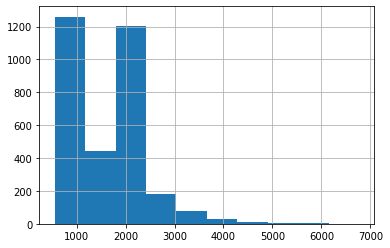

In [148]:
data['proceeds'].hist();

In [149]:
data['proceeds'].describe()

count   3,214.00
mean    1,532.59
std       799.65
min       550.00
25%       750.00
50%     1,667.50
75%     1,950.00
max     6,770.00
Name: proceeds, dtype: float64

In [150]:
data.groupby('tariff_name')['proceeds'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff_name,,,,,,,,
smart,"2,229.00","1,294.64",820.93,550.00,550.00,"1,038.00","1,750.00","6,770.00"
ultra,985.00,"2,071.07",378.80,"1,950.00","1,950.00","1,950.00","1,950.00","4,800.00"


### Выводы

Видим, что распределение имеет два пика. Возможно, что два пика вызваны различиями в распределениях выручки у разных групп пользователей, например, групп клиентов разных тарифов, или групп пользователей из разных регионов.

В среднем в год с пользователей компания получает выручка 1533 руб. (медиана == 1667.5 руб.), ст.откл. == 800 руб. Минимальная выручка составила 550 руб., а максимальная 6770 руб.  

Это можно проверить построив распределения гистограмм для разных групп. Например, проверим по тарифам.

In [151]:
# оставлю в комментариях, чтобы не дублировать информацию
#data[(data['tariff_name'] == 'smart')]['proceeds'].hist(bins=15);

In [152]:
#data[(data['tariff_name'] == 'ultra')]['proceeds'].hist(bins=10);

Обратим внимание на значения оси абцисс. Действительно, два пика вызваны различиями в распределениях выручки у пользователей по тарифам. 

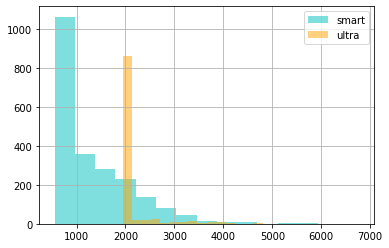

In [153]:
# Код ревьюера

data[(data['tariff_name'] == 'smart')]['proceeds'].hist(bins=15, label='smart', alpha=0.5, color='c')
data[(data['tariff_name'] == 'ultra')]['proceeds'].hist(bins=15, label='ultra', alpha=0.5, color='orange')
plt.legend();

Сравнение по тарифам показывает, что несмотря на то, что пользователей тарифа `ultra` меньше, выручка по этим клиентам выше. Средняя выручка составляет 2071 руб., при небольшом стандартном отклонении в 379 руб. Максимальная выручка в этом сегменте пользователей составила 4800 руб. При этом если посмотреть на квартили, то можно заметить, что как минимум не менее 75% пользователей не исчерпывали лимит и платили только абонентскую плату. Посчитаем, сколько пользователей тарифа `ultra` переплатили за исследуемый год.

In [154]:
data[(data['tariff_name'] == 'ultra') & (data['proceeds'] > 1950)].shape[0] 

134

In [155]:
(data.loc[(data['tariff_name'] == 'ultra'),'proceeds'] > 1950).mean() * 100

13.604060913705585

Всего 134 пользователя тарифка `ultra` переплатили за исследуемый год (приблизительно 13,6%).

Пользователей тарифа `smart` изначально было больше. Средняя годовая выручка по пользователям здесь составляет около 1295 руб., при этом медианная выручка равна 1038.0, что говорит о правостореннем скосе (см. гистограмму выше). Среднее квадратичное отклонение в этом сегменте выше, чем в сегменте пользователей `ultra`. Чуть больше четверти пользователей (27%) данного тарифа укладываются в тарифный пакет. Большинство используют минуты, сообщения и/или интернет за дополнительную плату по тарифному плану. Также отметим, что максимальная выручка в этом сегменте пользователей составила 6770 руб.

### Анализ поведения пользователей  

**Задание**  
Опишите поведение клиентов оператора, исходя из выборки.  
* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?   
* Посчитайте среднее количество, дисперсию и стандартное отклонение.  
* Постройте гистограммы. ~(сделано выше в разделе Предобработка данных)~  
* Опишите распределения.

In [156]:
# посмотрим на описательную статистику
data[['tariff_name','full_duration', 'count_of_messages', 'mb_duration']] \
    .groupby('tariff_name') \
    .agg(['mean', 'median', 'var', 'std']) \
    .astype(int)

full_duration                     count_of_messages               \
                     mean median     var  std              mean median   var   
tariff_name                                                                    
smart                 417    422   36219  190                33     28   796   
ultra                 526    518  100873  317                49     38  2285   

                mb_duration                           
            std        mean median        var    std  
tariff_name                                           
smart        28       16229  16531   34545911   5877  
ultra        47       19486  19324  101935621  10096

In [157]:
data.groupby('tariff_name')['proceeds'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff_name,,,,,,,,
smart,"2,229.00","1,294.64",820.93,550.00,550.00,"1,038.00","1,750.00","6,770.00"
ultra,985.00,"2,071.07",378.80,"1,950.00","1,950.00","1,950.00","1,950.00","4,800.00"


- Пользователям тарифа **smart** в среднем требуется около 417 минут звонков (медианное значение == 422), в среднем отправляют 33 сообщения (медиана - 28) и тратят приблизительно 17 Гб интернет-трафика в месяц. Медианный платеж по тарифу – 1038 рублей. 


- Пользователям тарифа **ultra** в среднем требуется около 526 минут звонков (медиана - 518), в среднем отправляют 49 сообщений (медиана - 38) и тратят до 20 Гб интернет-трафика в месяц. Медианный платеж по тарифу – 1950 рублей.
    
Построим гистограммы для наших переменных. Гистограммы для интернет-трафика уже построены тобой, Алексей, я воспользуюсь твоим кодом.


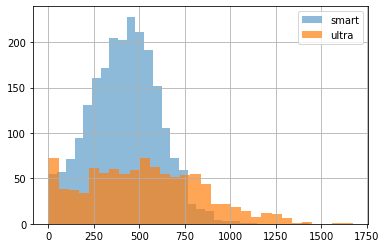

In [158]:
# гистограмма распределения длительности звонков
data[data['tariff_name'] == 'smart']['full_duration'].hist(bins=30,label='smart',alpha=0.5)
data[data['tariff_name'] == 'ultra']['full_duration'].hist(bins=30,label='ultra',alpha=0.7)
plt.legend();


    
Видим, что распределение минут звонков отличается у пользователей разных тарифов отличаются. У пользователей тарифа `smart` распределение близко к нормальному, а у пользователей тарифа `ultra` оно больше похоже на равномерное (по самым грубым оценкам). У пользователей тарифа `ultra` наблюдается длинный правый хвост - с большими значениями. 


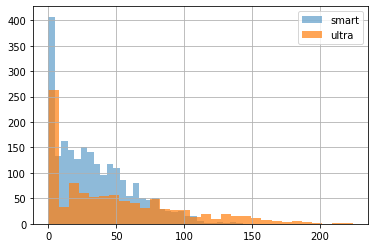

In [159]:
# гистограмма распределения числа отправляемых сообщений
data[data['tariff_name'] == 'smart']['count_of_messages'].hist(bins=30,label='smart',alpha=0.5)
data[data['tariff_name'] == 'ultra']['count_of_messages'].hist(bins=30,label='ultra',alpha=0.7)
plt.legend();


Распределения скошены вправо. У обоих распределение наблюдаются пиковые значения в области нуля. Снова видим, что у пользователей тарифа `ultra` распределение более пологое. 


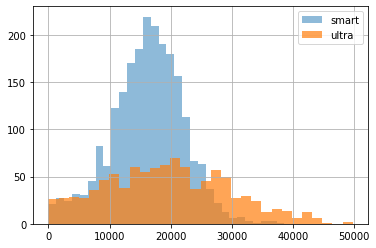

In [160]:
# Код ревьюера

# гистограмма распределения расходов интернет-трафика
data[data['tariff_name'] == 'smart']['mb_duration'].hist(bins=30,label='smart',alpha=0.5)
data[data['tariff_name'] == 'ultra']['mb_duration'].hist(bins=30,label='ultra',alpha=0.7)
plt.legend();


Распределения интернет-трафика напоминают нормальные распределения: у пользователей тарифа `smart` меньше дисперсии в данных, чем у пользователей тарифа `ultra`, чем могут объясняться различия в виде распределений. 


### Выводы  

- Пользователям тарифа `smart` в среднем требуется около `417` минут звонков, в среднем отправляют `33` сообщения и тратят приблизительно `17` Гб интернет-трафика в месяц. Медианный платеж по тарифу – `1038` рублей. 


- Пользователям тарифа `ultra` в среднем требуется около `526` минут звонков, в среднем отправляют `49` сообщений и тратят до `20` Гб интернет-трафика в месяц. Медианный платеж по тарифу – `1950` рублей.  

- Распределение минут звонков отличается у пользователей разных тарифов отличаются. У пользователей тарифа `smart` распределение близко к нормальному, а у пользователей тарифа `ultra` оно больше похоже на равномерное (по самым грубым оценкам). У пользователей тарифа `ultra` наблюдается длинный правый хвост - с большими значениями. 

- Распределения по отправленным сообщениям скошены вправо. Пиковые значения распределений вне зависимости от тарифа находятся в области нуля. Тем не менее у пользователей тарифа `ultra` распределение более пологое. 

- Распределения интернет-трафика напоминают нормальные распределения: у пользователей тарифа `smart` меньше дисперсии в данных, чем у пользователей тарифа `ultra`, что может объяснять различия в виде распределений. 


## Статистический анализ данных

**Задание**  
* ***Проверьте гипотезы:***
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  

Пороговое значение `alpha` задайте самостоятельно.
  
* ***Поясните:***
    - как вы формулировали нулевую и альтернативную гипотезы;
    - какой критерий использовали для проверки гипотез и почему.

In [161]:
# вспомним какие данные у нас есть в база data
data.columns

Index(['count_of_calls', 'full_duration', 'count_of_messages', 'mb_duration',
       'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff_name', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'over_call', 'rub_over_call', 'over_messages',
       'rub_over_messages', 'over_internet', 'rub_over_internet', 'proceeds'],
      dtype='object')

Итак, в базе есть все, что нам нужно. В колонке `'tariff_name'` есть названия тарифа; в столбце `'city'` - названия населенного пункта, а в колонке `'proceeds'` выручка по пользователям по месяцам. Среднюю выручки найдем по параметру `'proceeds'`. 


**Задание 1.**

Проверим различаются ли средние выручки пользователей тарифов «Ультра» и «Смарт».  

Итак, сформулируем *нулевую* и *альтернативную* гипотезы:  
$H_0$: Средняя выручка пользователей тарифов `Ультра` и `Смарт` не различаются.  
$H_1$: Средняя выручка пользователей тарифов `Ультра` и `Смарт` различаются. 

Мы проверяем двухстороннюю гипотезу о равенстве средних в двух независимых выборках. Для проверки гипотезы будем применять t-test. Наши выборки независимы, нормальная распределенность выборочных средних обеспечивается Центральной предельной теоремой. А по поводу равенства дисперсий есть сомнения. А еще помним, что размеры выборок разные (ниже еще раз в этом убедимся), поэтому при применении t-теста укажем, что дисперсии не равны. 

Критический уровень $\alpha$ установим равным 0.05.

In [162]:
ultra = data.query('tariff_name == "ultra"').copy()
print(ultra.shape)

smart = data.query('tariff_name == "smart"').copy()
print(smart.shape)

(985, 25)
(2229, 25)


Действительно, выборка пользователей тарифа `Ультра` в разы меньше.

In [163]:
# применим t-test

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(ultra['proceeds'], smart['proceeds'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различаются.") 

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.


In [164]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')
    return mean, confidence_interval

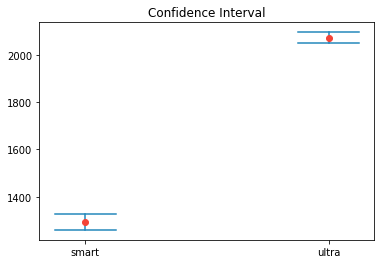

In [165]:
plt.xticks([1, 2], ['smart', 'ultra'])
plt.title('Confidence Interval')
plot_confidence_interval(1, smart['proceeds'])
plot_confidence_interval(2, ultra['proceeds'])
plt.show()

**Вывод**

Итак, мы видим, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются статистически значимо различаются ($p < \alpha = 0.05$)

In [166]:
# посмотрим на значения средних выручек
print('Средняя выручка по тарифу "Ультра" равна ', round(ultra['proceeds'].mean()))
print('Средняя выручка по тарифу "Смарт" равна ', round(smart['proceeds'].mean()))

Средняя выручка по тарифу "Ультра" равна  2071
Средняя выручка по тарифу "Смарт" равна  1295


Выручка по тарифу `Ультра` больше.

**Задание 2.**

Проверим различается ли средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Итак, сформулируем *нулевую* и *альтернативную* гипотезы:  
$H_0$: Средняя выручка пользователей из Москвы НЕ отличается от средней выручки пользователей из других регионов.  
$H_1$: Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов. 

Так же, как и в первом задании, мы проверяем двухстороннюю гипотезу о равенстве средних в двух независимых выборках. Для проверки гипотезы будем применять t-test. Наши выборки независимы, нормальная распределенность выборочных средних обеспечивается Центральной предельной теоремой. Еще нужно проверить размеры выборок, и потом при применении t-теста решить указывать, что дисперсии не равны или нет. 

Критический уровень $\alpha$ установим равным 0.05.

In [167]:
# не будем создавать новую переменную для выделения групп пользователей из Москвы и других регионов
moscow = data.query('city == "Москва"').copy()
print(moscow.shape)

other_region = data.query('city != "Москва"').copy()
print(other_region.shape)

(611, 25)
(2603, 25)


Видим, что пользователей из Москвы меньше по сравнению с общим числом пользователей из других регионов. Хотя, напомним, что если сравнивать отдельно по каждому региону, то пользователей из Москвы намного больше. 

Итак, приступим к проверке гипотезы. В t-test укажем, что дисперсии не равны.

In [168]:
# посмотрим на значения средних
print('Средняя выручка пользователей из Москвы равна ', round(moscow['proceeds'].mean()))
print('Средняя выручка пользователей из других регионов равна ', round(other_region['proceeds'].mean()))

Средняя выручка пользователей из Москвы равна  1551
Средняя выручка пользователей из других регионов равна  1528


Видим, что значения средних довольно близки, хотя по Москве чуть больше.

In [169]:
# применим t-test

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(moscow['proceeds'], other_region['proceeds'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы НЕ отличается от средней выручки пользователей из других регионов.") 

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы НЕ отличается от средней выручки пользователей из других регионов.


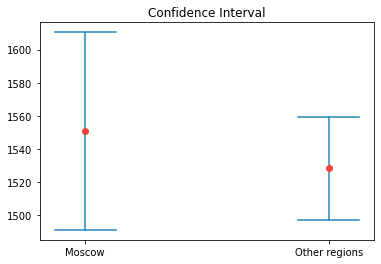

In [170]:
plt.xticks([1, 2], ['Moscow', 'Other regions'])
plt.title('Confidence Interval')
plot_confidence_interval(1, moscow['proceeds'])
plot_confidence_interval(2, other_region['proceeds'])
plt.show()

**Вывод** 

Нулевая гипотеза о равенстве средней выручки в двух выборках не удалось отвергнуть. Средняя пользователей из Москвы статистически значимо НЕ отличается от средней выручки пользователей из других регионов.

## Общий вывод

В данном проекте анализировались данные 500 пользователей «Мегалайна». Было дано 5 датасетов: в первом содержалась информация о пользователях (id, ФИО, регион, каким тарифом пользуются), во втором и третьем информация о звонках и сообщений соответственно, в четвертом - информация про использованный объем интернет трафика, и последнем информация по сами тарифы. Данные были за `2018` год. Основной целью проекта являлось провести анализ поведения клиентов и выяснить какой тариф лучше. 

1) В изучаемых данных практически полностью отсутствовали пропущенные значения, также не было обнаружено аномальных значений или явных ошибок в данных не обнаружено.  
2) Пользователи распределились неровно по тарифам. Большая часть клиентов (`70%`) используют тариф `Смарт`. Распределение по регионам тоже неравномерное: большая часть клиентов из Москвы (`20%`).  
3) Распределение пользователей по возрасту больше похоже на равномерное. Медианный возраст пользователей - `46` лет. Самому юному пользователю `18` лет, а самому старшему - `75` лет.  
4) За `2018` год исследуемые `500` пользователей совершили более `200` тыс. звонков (средняя длительность звонка - `6,75` мин., ст. отк. - `5,84` мин.), направили более `120` тыс сообщений и совершали практически `150` тыс. интернет-сессий (средний объем интернет-трафика - `370` Мб, ст.откл. - `278` Мб).  
5) В рамках проекта была найдена средняя выручка по каждому пользователю по месяцам. В среднем в год с пользователей компания получает выручка `1533` руб. (медиана - `1667.5` руб.), ст.откл. - `800` руб. Минимальная выручка составила `550` руб., а максимальная составила `6770` руб. Гистограмма распределения выручки показало наличие двух пиков.  
6) Сравнение по тарифам показывает, что несмотря на то, что пользователей тарифа `Ультра` меньше, выручка по этим клиентам выше. Средняя выручка составила `2071` руб., при небольшом стандартном отклонении в `379` руб. Большая часть клиентов (`84%`) укладываются в тарифный пакет и как правило не пользуются дополнительными услугами. Средняя годовая выручка пользователей тарифа `Смарт` составила примерно `1295` руб., при этом медианная выручка равна `1038` руб.  Чуть больше четверти пользователей (`27%`) тарифа `Смарт` укладываются в тарифный пакет. Большинство используют минуты, сообщения и/или интернет за дополнительную плату по тарифному плану.  
7) Анализ поведения пользователей показывает:  

- пользователям тарифа `Смарт` в среднем требуется около `417` минут звонков, в среднем отправляют `33` сообщения и тратят приблизительно `17` Гб интернет-трафика в месяц. Медианный платеж по тарифу – `1038` рублей;
- пользователям тарифа `Ультра` в среднем требуется около `526` минут звонков, в среднем отправляют `49` сообщений и тратят до `20` Гб интернет-трафика в месяц. Медианный платеж по тарифу – `1950` рублей;
- распределение минут звонков отличается у пользователей разных тарифов отличаются. У пользователей тарифа `Смарт` распределение близко к нормальному, а у пользователей тарифа `Ультра` оно больше похоже на равномерное (по самым грубым оценкам). У пользователей тарифа `Ультра` наблюдается длинный правый хвост - с большими значениями;
- распределения по отправленным сообщениям скошены вправо. Пиковые значения распределений вне зависимости от тарифа находятся в области нуля. Тем не менее у пользователей тарифа `Ультра` распределение более пологое;
- распределения интернет-трафика напоминают нормальные распределения: у пользователей тарифа `Смарт` меньше дисперсии в данных, чем у пользователей тарифа `Ультра`, что может объяснять различия в виде распределений.

8) Статистический анализ данных показал: 

- существуют статистически значимые различия между средней выручке пользователей разных тарифов ($p < 0.05$). Средняя выручка по тарифу `Ультра` больше, чем средняя выручка по тарифу `Смарт`, несмотря на то, что в целом пользователей тарифа `Ультра` меньше;  
- не обнаружено статистически значимых различий в средней выручке пользователей из Москвы и других регионов.

Таким образом, на основании проделанного исследования можно делать вывод, что тариф `Ультра` является более выгодным для компании "Мегалайн". Несмотря на то, что пользователей этого тарифа меньше, средняя выручка по тарифу больше. 

*p.s. Теперь понятно почему Мегафон практически всегда стремится избавиться от недорогих пакетных тарифов и оставить только дорогие, хотя пользователям не всегда нужны предоставляемые лимиты услуг в таких объемах ...*
